# Using the OmicsIntegrator Package

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

# Use the following lines to test the basic functionality of the package if developing locally: 
# import sys
# sys.path.insert(0, "/the/path/to/OmicsIntegrator2/src")
# from graph import Graph

from OmicsIntegrator import *

interactome_file = "/Users/alex/Documents/OmicsIntegrator2/data/inbiomap_exp.normalized.cleaned.tsv"
prize_file = "/Users/alex/Documents/OmicsIntegrator2/data/prizes.tsv"
graph = Graph(interactome_file, {})

graph.prepare_prizes(prize_file)


11:10:36 - Graph: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
11:10:36 - Graph: INFO - ['CTGF', 'EZR', 'HSPA5']
11:10:36 - Graph: INFO - Members of the prize file not present in the interactome:
11:10:36 - Graph: INFO - ['KIAA1543', 'PKM2', 'PLEC1', 'SFRS1']


In [2]:
vertex_indices, edge_indices = graph.pcsf()

In [3]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

/Users/alex/Documents/OmicsIntegrator2/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/alex/Documents/OmicsIntegrator2/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/alex/Documents/OmicsIntegrator2/venv/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/alex/Documents/OmicsIntegrator2/venv/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserW

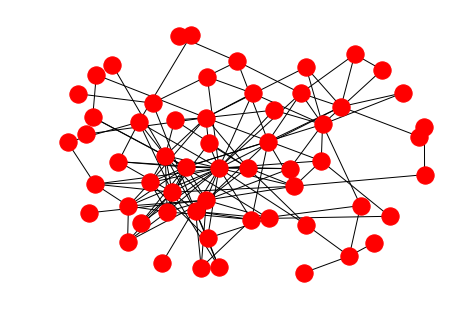

In [4]:
nx.draw_spring(augmented_forest)

In [5]:
graph.pcsf_objective_value(forest)

14.815